<a id='mdv'></a>  
# Multi-dimensional Data Visualization

[import](#mdv-import)  
[visualize](#mdv-visualize)   

## libraries

In [1]:
import os
import glob
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import cartopy
import cartopy.feature as cfeature

import cartopy.crs as ccrs

In [2]:
import warnings # to ignore warnings
from functools import partial # for shorter traceback error messages
from IPython.core.interactiveshell import InteractiveShell # to automtically show cell output

### parameters

In [3]:
# ignore warnings 
warnings.filterwarnings('ignore')

In [4]:
# shorter traceback error messages
get_ipython().showtraceback = partial(get_ipython().showtraceback,exception_only=True)

In [5]:
# shows result of cell without needing print
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

## directories

In [6]:
project_id = 'gta'
#project_id = 'ea'

'gta'

In [7]:
home_dir = os.path.expanduser("~")
project_dir = os.path.join(home_dir, project_id)
data_dir = os.path.join(project_dir, 'data')
restructured_data_dir = os.path.join(data_dir, 'restructured-data')
aggregated_data_dir = os.path.join(data_dir, 'aggregated-data') 

'/Users/rkforest/gta/data/aggregated-data'

In [8]:
os.chdir(project_dir)
os.getcwd()

'/Users/rkforest/gta'

## parameters

In [9]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget

## paths

In [10]:
file_paths =  sorted(glob.glob(os.path.join(aggregated_data_dir, '*.nc')))
[print(path) for path in file_paths];

/Users/rkforest/gta/data/aggregated-data/global_multi-dimensional_average_10y.nc


<a id='mda-import'></a>
## import

[Return to Start of Notebook](#mda)  

In [11]:
file_path = file_paths[0]
ds = xr.open_dataset(file_path)
type(ds)

xarray.core.dataset.Dataset

In [12]:
ds

<xarray.Dataset>
Dimensions:      (lon: 90, lat: 45, time: 16)
Coordinates:
  * lon          (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat          (lat) float32 -88.0 -84.0 -80.0 -76.0 ... 76.0 80.0 84.0 88.0
  * time         (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
Data variables:
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

In [13]:
da = ds['tempanomaly']

<xarray.DataArray 'tempanomaly' (time: 16, lat: 45, lon: 90)>
[64800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 1880-12-31 1890-12-31 ... 2030-12-31
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-04-11 11:10:31 by SBBX_to_nc 2.0 - ILAND=1200,...

<a id='mdv-visualize'></a>
## visualize

[Return to Start of Notebook](#mdv)  

In [14]:
plot_decade = 2020

2020

### .plot()

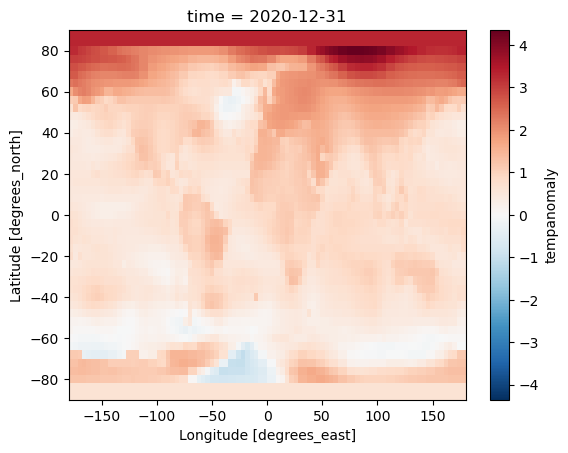

In [15]:
da.sel(time=str(plot_decade)).plot(yincrease=True) # default yincrease=True

### cartopy

#### plt.axes( )

- The line plt.axes(projection=ccrs.PlateCarree()) sets up a GeoAxes instance which exposes a variety of other map related methods,

cartopy.mpl.geoaxes.GeoAxes

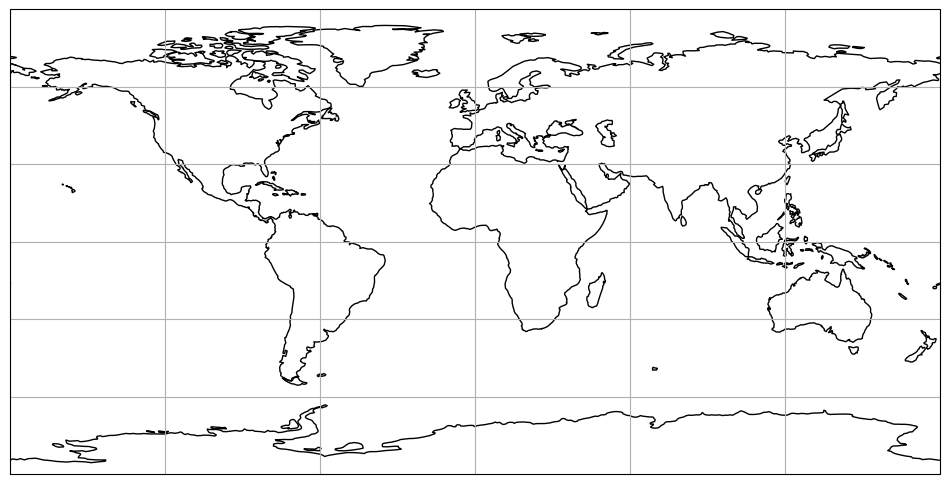

In [16]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

type(ax)

#### ccrs projections

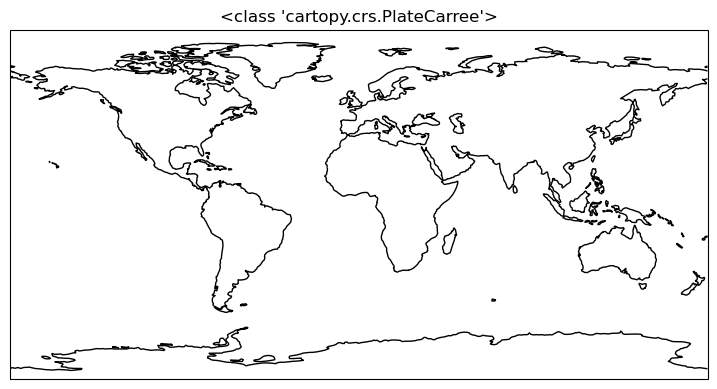

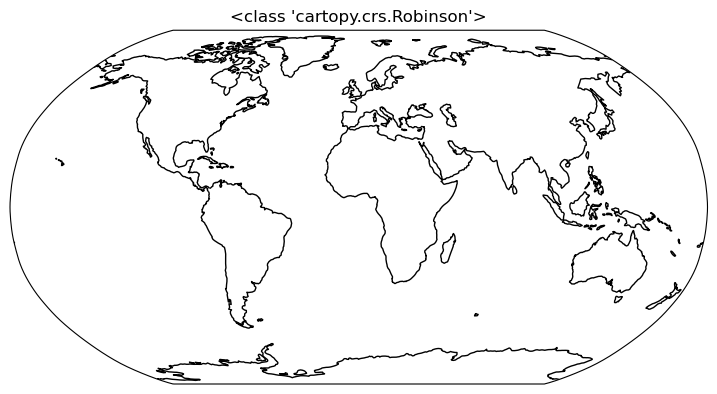

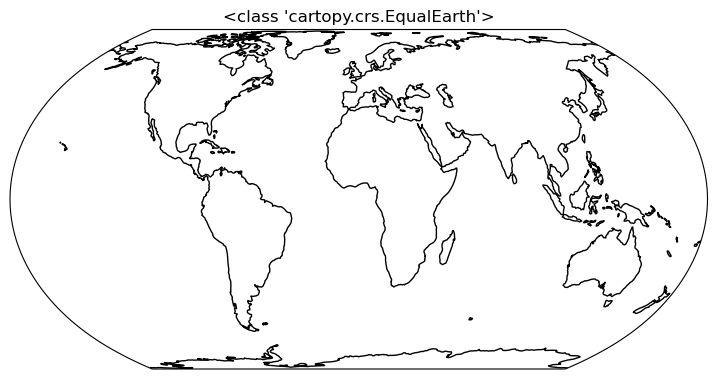

In [17]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.EqualEarth()
              ]
for proj in projections:
    plt.figure(figsize=(9,6))
    ax = plt.axes(projection=proj)
    #ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

#### .plot()

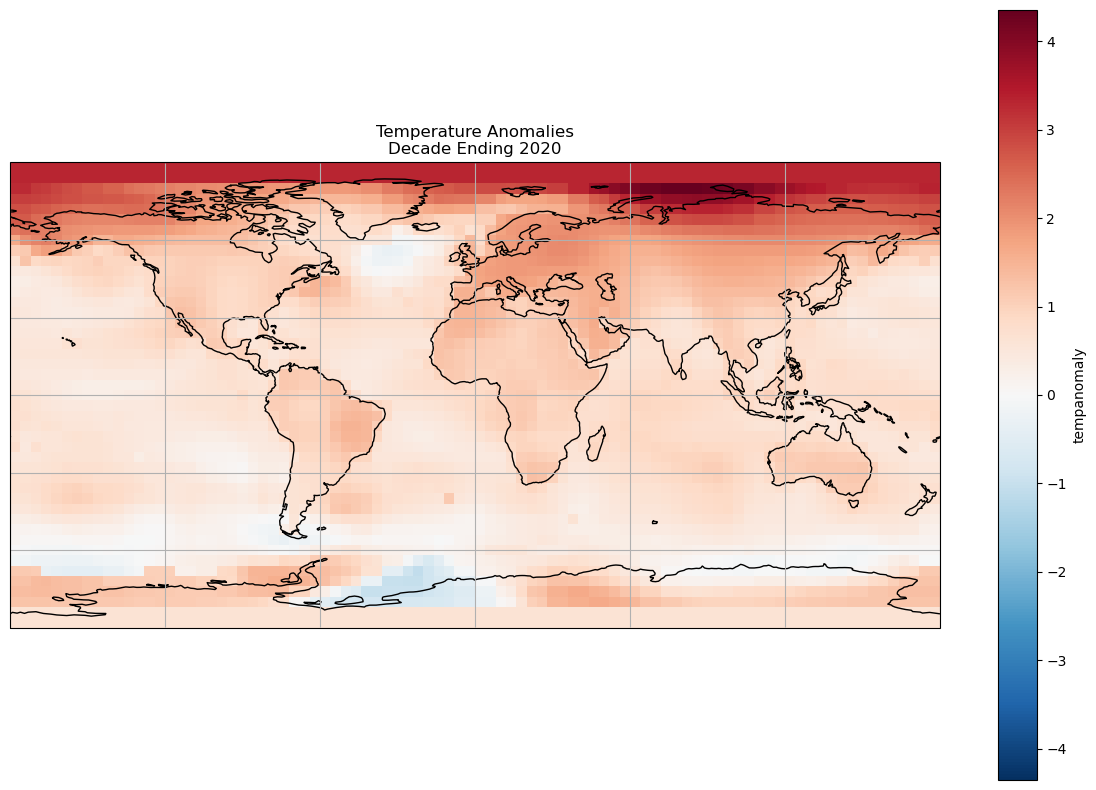

In [18]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

da.sel(time=str(plot_decade)).plot(ax=ax)

ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

#### colorbar

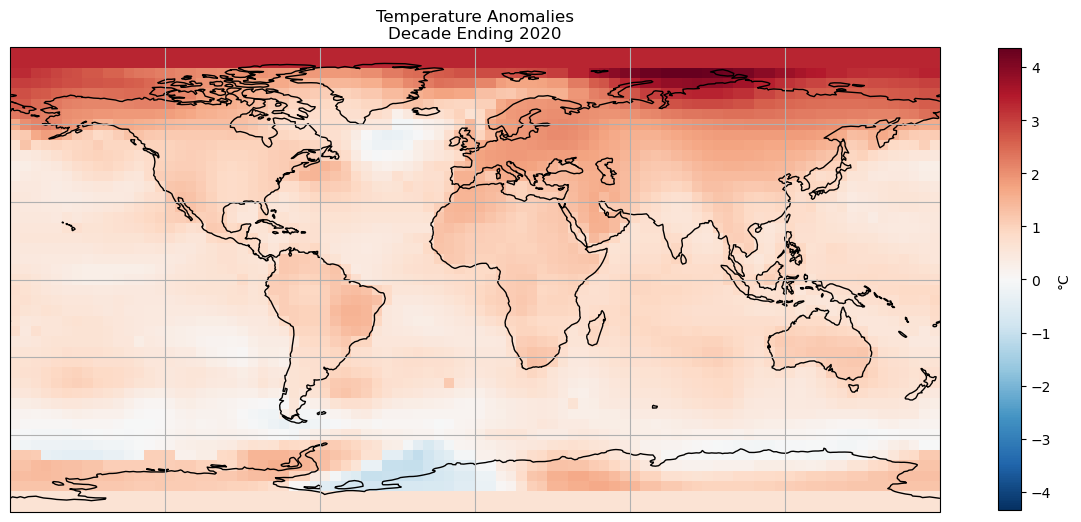

In [19]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

da.sel(time='2020').plot(ax=ax,
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"})

ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

#### cmap

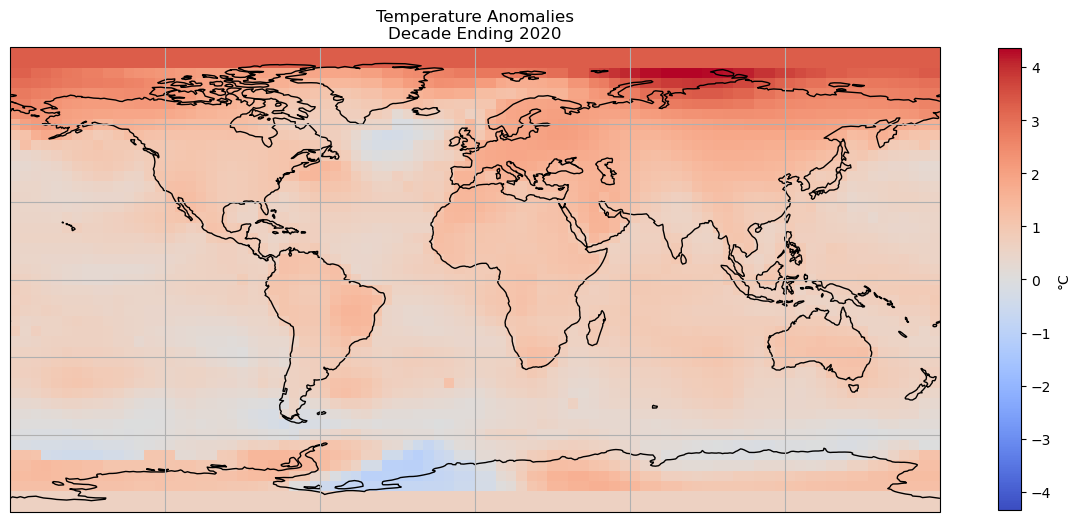

In [20]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

da.sel(time='2020').plot(ax=ax,
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"},
                         cmap='coolwarm'
                        )

ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

#### transform

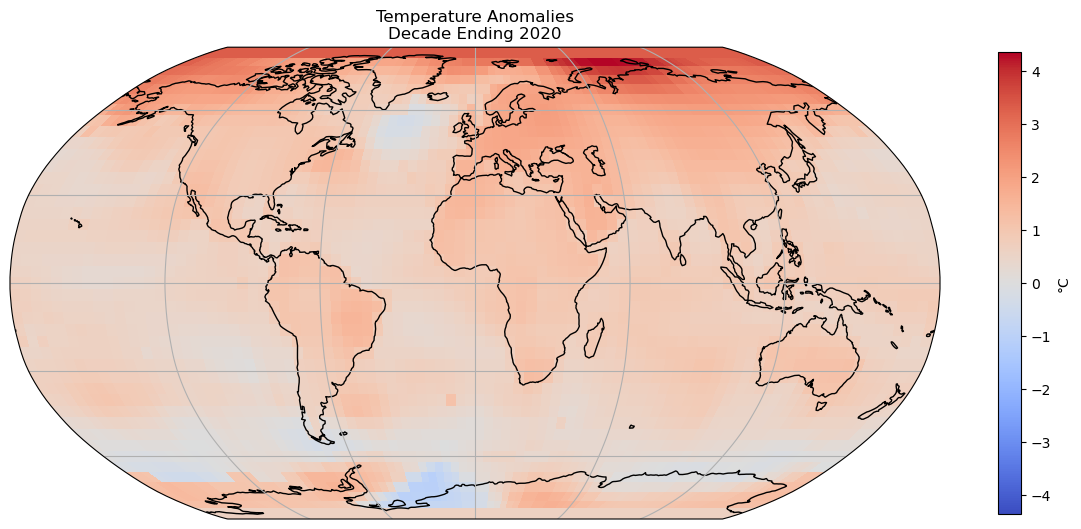

In [21]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
da.sel(time='2020').plot(ax=ax,
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'shrink': 0.6,
                     "label": "°C"}, cmap='coolwarm')
ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

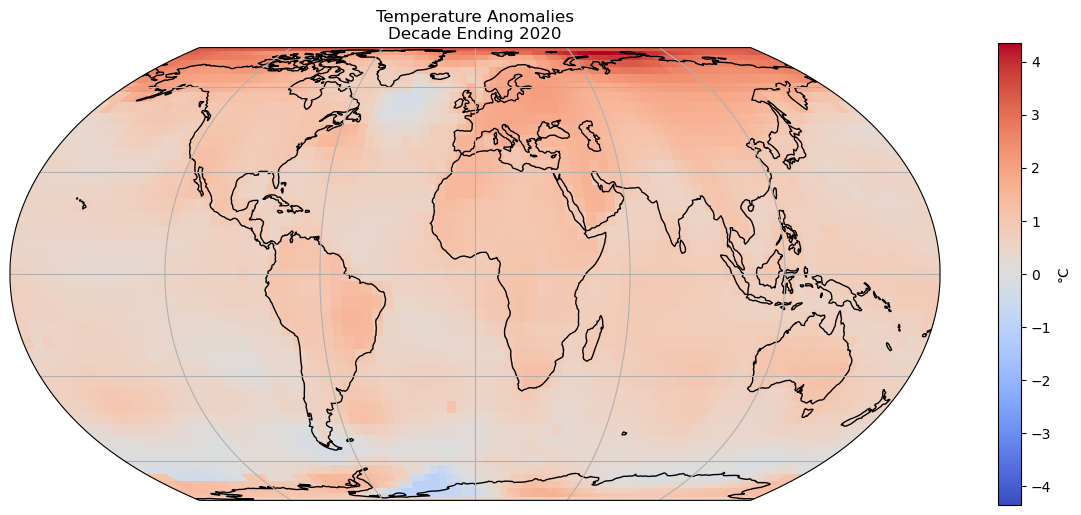

In [22]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines()
ax.gridlines()
da.sel(time='2020').plot(ax=ax,
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'shrink': 0.6,
                     "label": "°C"}, cmap='coolwarm')
ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

#### .set_extent

In [23]:
europe_extent =  [-10, 40, 30, 70]
africa_extent = [-25,55,-30,30]

[-25, 55, -30, 30]

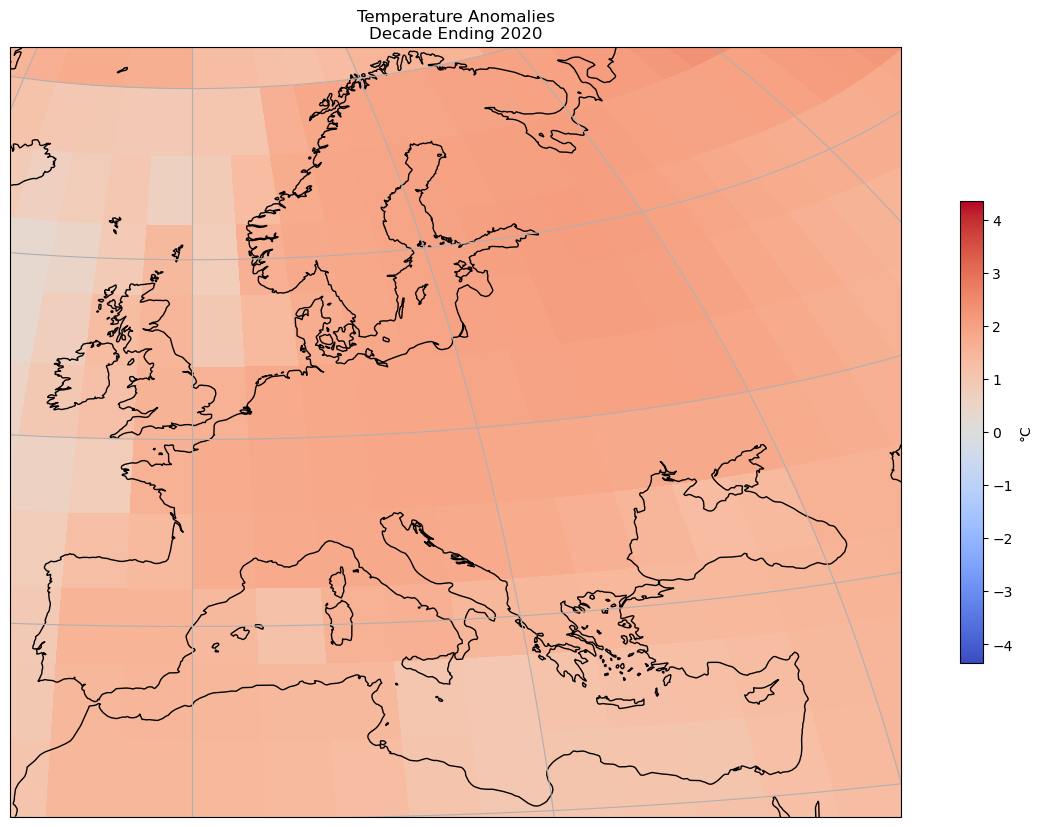

In [24]:
fig = plt.figure(figsize=(15,10))

extent = europe_extent
#extent = africa_extent

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea())

ax.coastlines()
ax.gridlines()

da.sel(time='2020').plot(ax=ax,
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"},
                         cmap='coolwarm'
                        )
ax.set_extent(extent)
ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

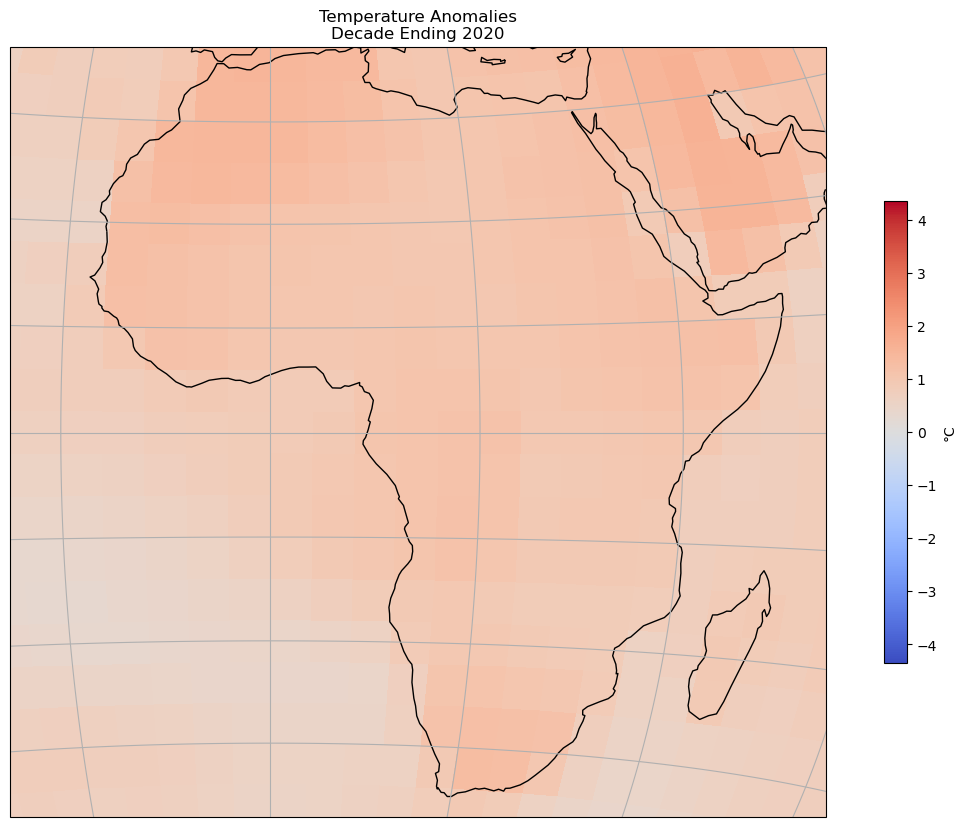

In [25]:
fig = plt.figure(figsize=(15,10))

#extent = europe_extent
extent = africa_extent

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea())

ax.coastlines()
ax.gridlines()

da.sel(time='2020').plot(ax=ax,
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"},
                         cmap='coolwarm'
                        )
ax.set_extent(extent)
ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

#### .feature

- default features are at 50m resolution.

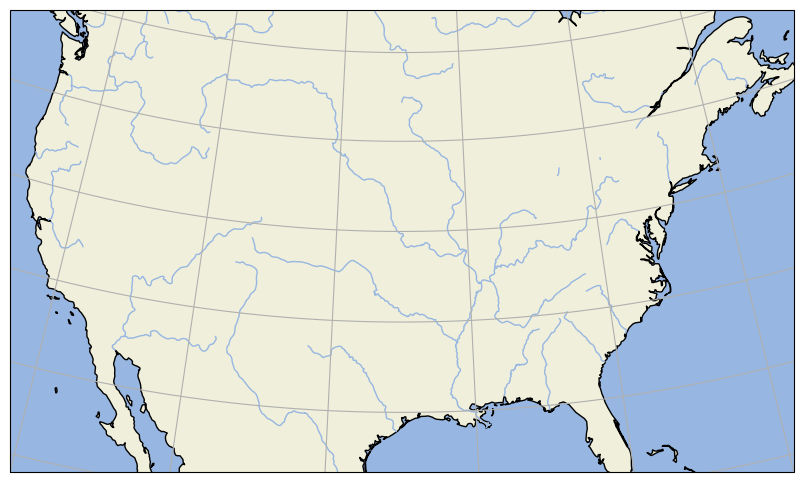

In [26]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

##### higher resolution

In [27]:
rivers_110m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '110m')
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

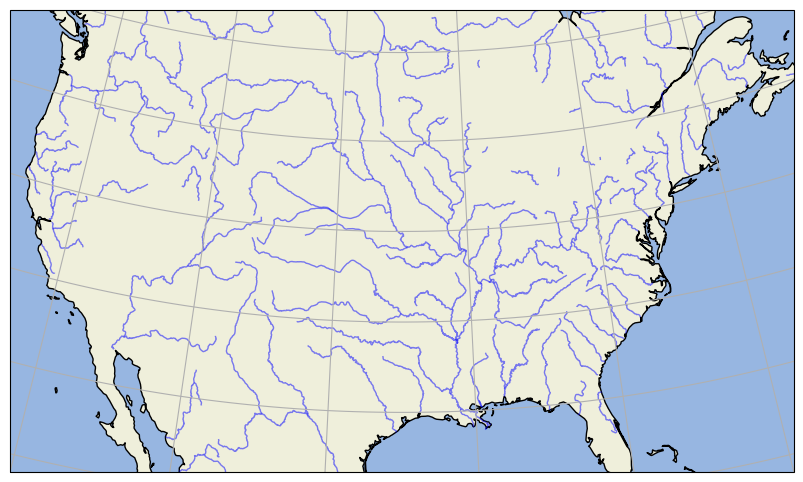

In [28]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_10m, facecolor='None', edgecolor='blue', alpha=0.5)

ax.gridlines()

#### contour plots

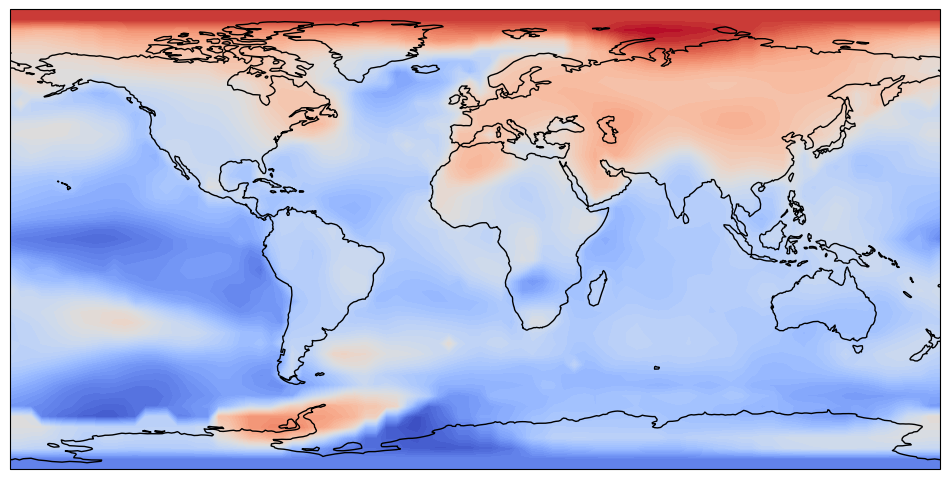

In [29]:
fig = plt.figure(figsize=(12,8))

lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
tpan = ds.variables['tempanomaly'][-1, :, :]

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(lons, lats, tpan, 60,
             transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
plt.show()

### levels

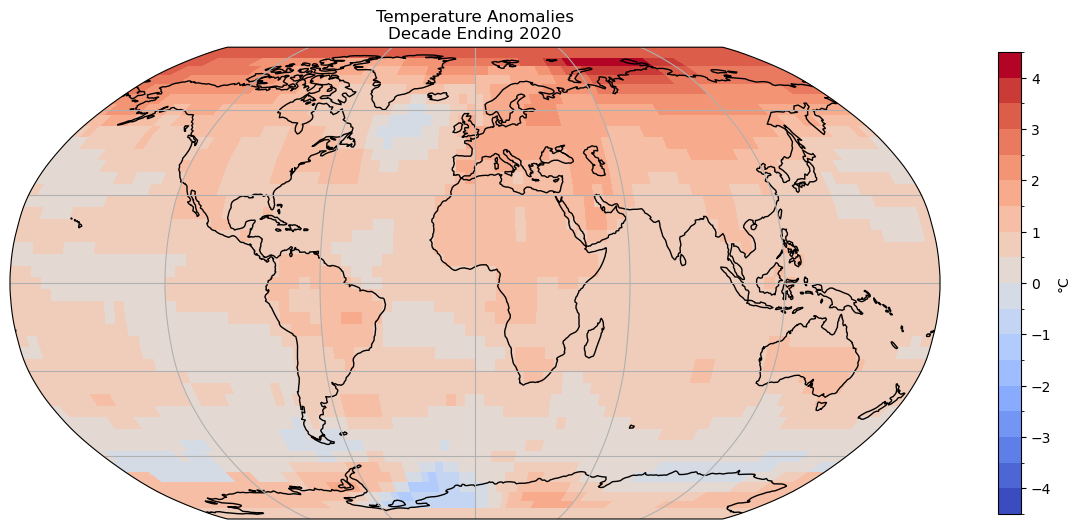

In [30]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
da.sel(time='2020').plot(ax=ax,
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"},
                         cmap='coolwarm',
                         levels=20,
                        )
ax.set_title('Temperature Anomalies\nDecade Ending ' + str(plot_decade));

### facet

ValueError: Can't use axes when making faceted plots.

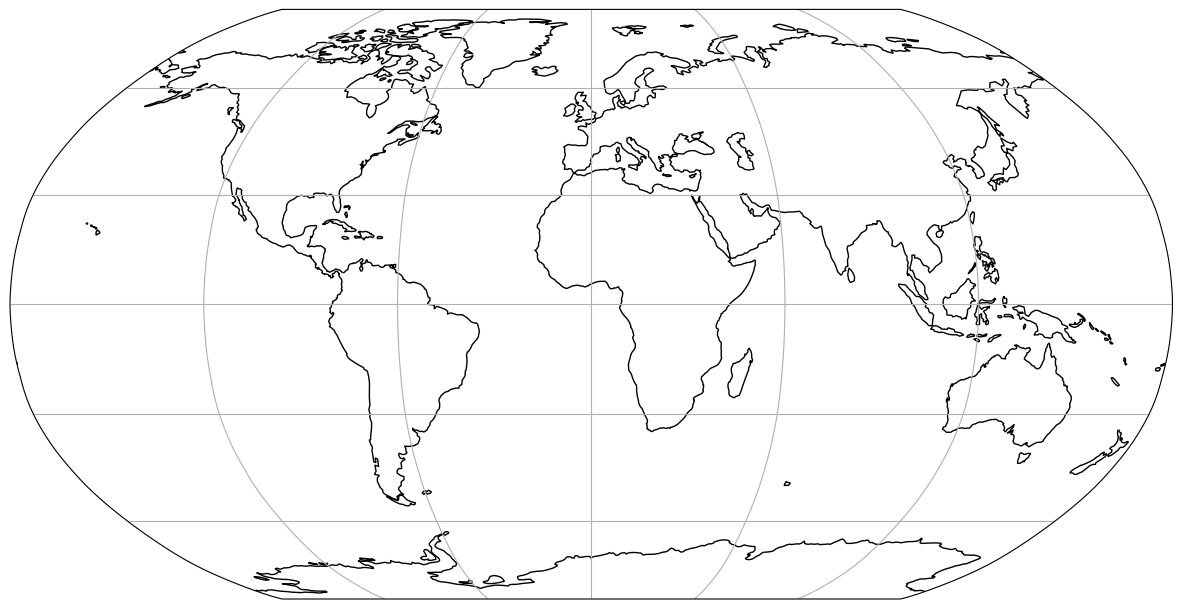

In [31]:
fig = plt.figure(figsize=(15,10))

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
da.sel(time='2020').plot(ax=ax,
                         transform=ccrs.PlateCarree(),
                         cbar_kwargs={'shrink': 0.6,
                                      "label": "°C"},
                         cmap='coolwarm',
                         col='time',
                        )
plt.suptitle('Temperature Anomalies\nDecade Ending ' + str(plot_decade));